# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [ ]:
import urllib.request
import os
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
```
When prices go over 999, they become formatted with commas, making them
non-numeric. To clean the price variable, I removed the commas from all
entries and converted to numeric, and I don't end up with any missing values.
I also delete any dollar signs (not sure if present but thought it could be common) and convert everything to an actual number.
Please see code in the cell below.

```
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
```
Around 76% of the values are missing. When I cross-tabulate, I notice a high count of bodily force, chemical irritant, and taser cases
missing.
```
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?
```
By replacing all of the missing values with the median you reduce variability in your
dataset. It makes the distribution tighter, and so the std dev decreases (as I observed after running my code).
```

In [ ]:

import pandas as pd
import numpy as np
## NOTE: need to run each question block on its own for it to work properly unless otherwise stated.
# QUESTION 1:
airbnb = pd.read_csv("./data/airbnb_NYC.csv", encoding="latin-1")
airbnb["Price"] = (airbnb["Price"].str.replace("$", "", regex=False)
  .str.replace(",", "", regex=False)
)
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors="coerce")
airbnb["Price"].isna().sum()

# QUESTION 2:
mn = pd.read_csv("./data/mn_police_use_of_force.csv")
mn["subject_injury"] = mn["subject_injury"].str.strip().str.lower()
mn["subject_injury"] = mn["subject_injury"].replace({
    "yes": "Yes",
    "no": "No"
})

mn["subject_injury"].isna().mean()
pd.crosstab(mn["force_type"], mn["subject_injury"], dropna=False)

mn["subject_injury_clean"] = mn["subject_injury"].fillna("Missing")
pd.crosstab(mn["force_type"], mn["subject_injury_clean"], dropna=False)

# QUESTION 3:
meta = pd.read_csv("./data/metabric.csv")
s = meta["Overall Survival Status"].astype("string").str.strip().str.lower()
meta["survival_dummy"] = s.map({"0:living": 1, "1:deceased": 0})
meta["survival_dummy"].value_counts(dropna=False)

# QUESTION 4 (relies on Q1 running to run properly):
airbnb["Review Scores Rating"].isna().sum()
median_rating = airbnb["Review Scores Rating"].median(skipna=True)
airbnb["Review Scores Rating (NaN)"] = airbnb["Review Scores Rating"].fillna(median_rating)
airbnb[["Review Scores Rating", "Review Scores Rating (NaN)"]].describe()



,Review Scores Rating,Review Scores Rating (NaN)
count,22155.000000,30478.000000
mean,91.993230,92.541243
std,8.850373,7.598524
min,20.000000,20.000000
25%,89.000000,90.000000
50%,94.000000,94.000000
75%,100.000000,97.000000
max,100.000000,100.000000


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
sharks = pd.read_excel("./data/GSAF5.xls")
sharks = sharks.dropna(axis=1, how="all")
sharks.shape


FileNotFoundError: [Errno 2] No such file or directory: './data/GSAF5.xls'

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
```
I found that the histogram is heavily right skewed.
```
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
```
61.2% are contracts, 38.75% are monetary gifts, and 0.03% are real estate.
```
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
```
Gifts: England, China, Canada, Japan, Switzerland, Saudi Arabia, France, Germany, Hong Kong, South Korea, Qatar, Netherlands, Korea, India, Taiwan
Amount: Qatar, England, China, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, Australia
```
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
```
Carnegie Mellon University, Cornell University, Harvard University, Massachusets Institute of Technology, Yale University, Texas A&M University,
Johns Hopkins University, Northwestern University, Georgetown University, University of Chicago (The), University of Colorodo Boulder,
Duke University, Brigham Young University, Stanford University, University of Texas MD Anderson Cancer Center
```
6. Which giftors provide the most money, in total?
```
Qatar Foundation, Qatar Foundation/Qatar National Res, Qatar Foundation for Education, Anonymous, etc.
```

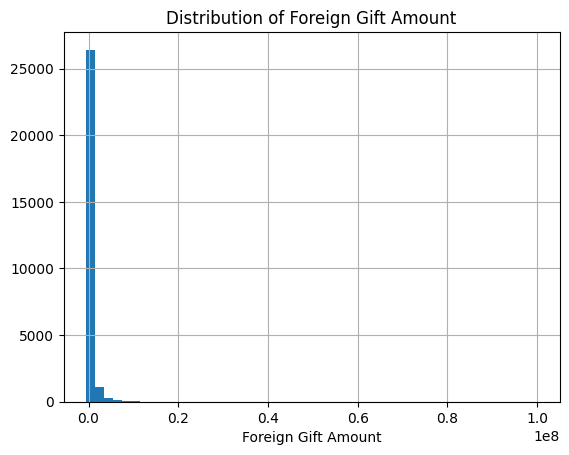

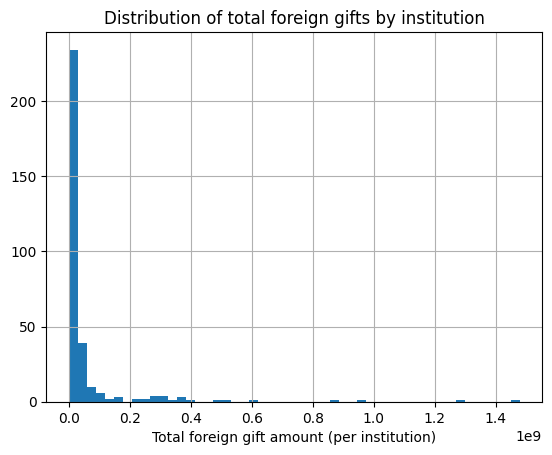

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


In [ ]:
import matplotlib.pyplot as plt
# QUESTION 1:
fg = pd.read_csv("./data/ForeignGifts_edu.csv")
# QUESTION 2:
fg["Foreign Gift Amount"].hist(bins=50)
plt.xlabel("Foreign Gift Amount")
plt.title("Distribution of Foreign Gift Amount")
plt.show()
fg["Foreign Gift Amount"].describe()

# QUESTION 3:
fg["Gift Type"].value_counts(normalize=True, dropna=False)

# QUESTION 4:
fg["Country of Giftor"].value_counts().head(15)
fg.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

# QUESTION 5:
inst_totals = (fg.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False))
inst_totals.head(15)
inst_totals.hist(bins=50)
plt.xlabel("Total foreign gift amount (per institution)")
plt.title("Distribution of total foreign gifts by institution")
plt.show()

# QUESTION 6:
fg.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(20)


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
```
There are 3798 observations and 62 variables (63 if you count the indexing).
```
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
```
I notice that the Private not-for-profits are almost all 4-year as well.
Public is 2-year dominated, and Private for-profit is the only one with something close to an even distribution.
```
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
```
Prior to conditioning on control, the grad value is very dense closer to 0, and then fades as it gets bigger.
Both public and private for-profit follow this same pattern, but private not-for-profit follows more of a bellcurve style shape.
```
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?
```
Before conditioning on control, there's no really clear trend in the data. Theres a big cluster in the bottom left, but other than that there is no very strong trend.
After conditioning on control, private for-profit seemed to not vary positively with graduation rates, but the rest did.
```

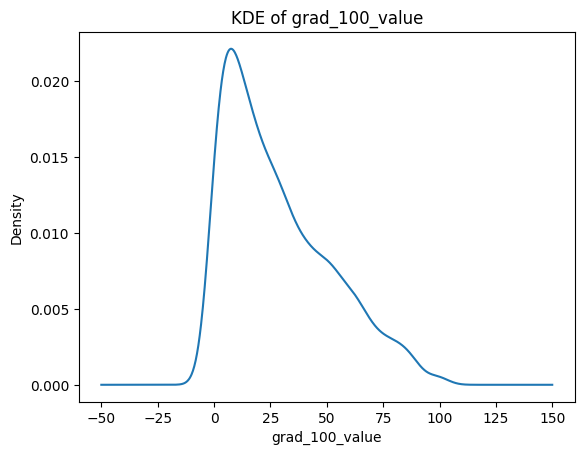

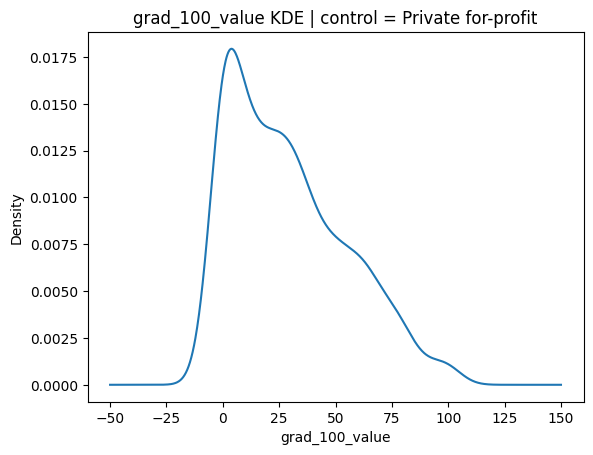

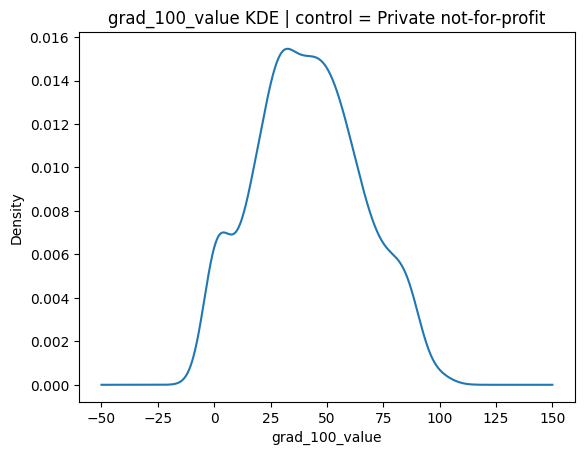

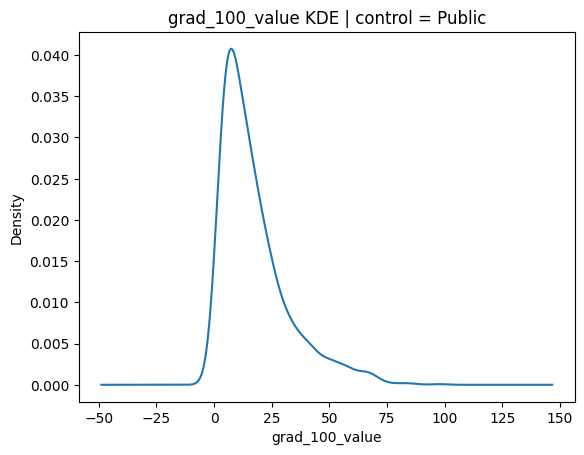

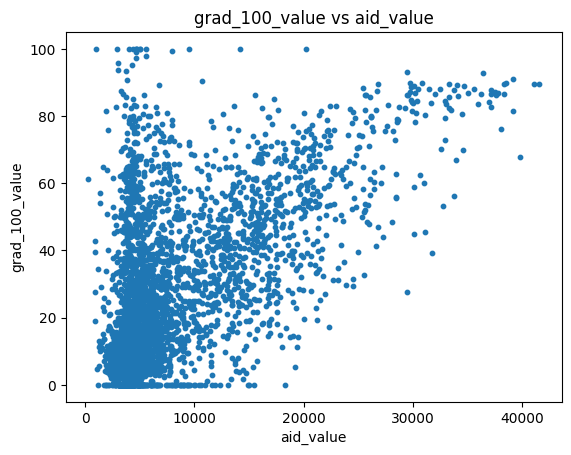

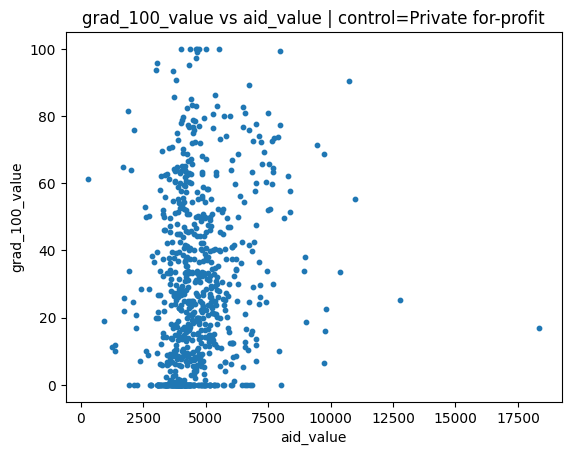

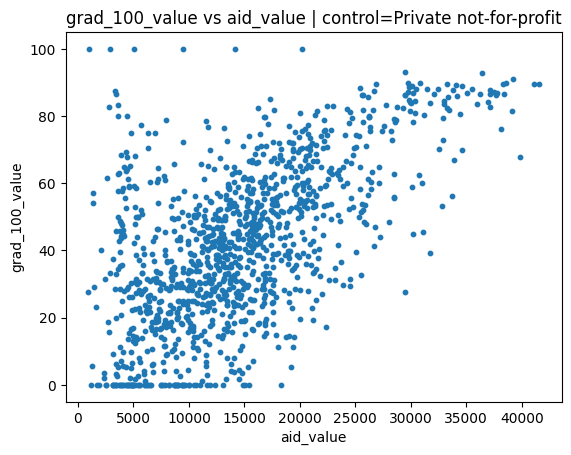

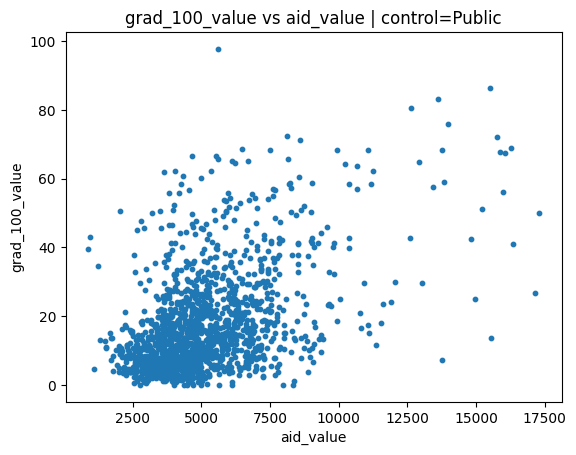

In [ ]:
# QUESTION 1:
cc = pd.read_csv("./data/college_completion.csv")
# QUESTION 2:
cc
# QUESTION 3:
pd.crosstab(cc["control"], cc["level"], dropna=False)
# QUESTION 4:
cc["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("grad_100_value"); plt.title("KDE of grad_100_value")
plt.show()
for ctrl, sub in cc.groupby("control"):
    sub["grad_100_value"].dropna().plot(kind="kde")
    plt.title(f"grad_100_value KDE | control = {ctrl}")
    plt.xlabel("grad_100_value")
    plt.show()

# QUESTION 5:
cc.plot.scatter(x="aid_value", y="grad_100_value", s=10)
plt.title("grad_100_value vs aid_value")
plt.show()
cc[["aid_value", "grad_100_value"]].cov(), cc[["aid_value", "grad_100_value"]].corr()
for ctrl, sub in cc.groupby("control"):
    tmp = sub[["aid_value", "grad_100_value"]].dropna()
    plt.figure()
    plt.scatter(tmp["aid_value"], tmp["grad_100_value"], s=10)
    plt.xlabel("aid_value")
    plt.ylabel("grad_100_value")
    plt.title(f"grad_100_value vs aid_value | control={ctrl}")
    plt.show()


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
\
$m(a + bX) = \dfrac{1}{N} \sum(a+bx_i)$ \
$m(a + bX) = \dfrac{1}{N} (\sum a + b \sum x_i)$ \
$m(a + bX) = \dfrac{1}{N}(N_a) + {b}{\dfrac{1}{N}}\sum x_i$ \
$m(a + bX) = a + b \times m(X)$

2. Show that $ \text{cov}(X,X) = s^2$.
\
$ \text{cov}(X,X) = \dfrac{1}{N} \sum (x_i - m(X))(x_i - m(X)) $
$ \text{cov}(X,X) = \dfrac{1}{N} \sum (x_i - m(X))^2 $ \
That is the exact definition of $s^2$. Proof complete

3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
```
The TwnhsE building types are the most expensive on average, whereas the 1Fam building types have the higest variance in transation prices.
```
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
```
Yes, there are a good amount of outliers. I see that 1Fam has the majority of the outliers however when I condition it on building type.
```
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?
```
The mean and the std dev go down significantly after winsorizing.
```

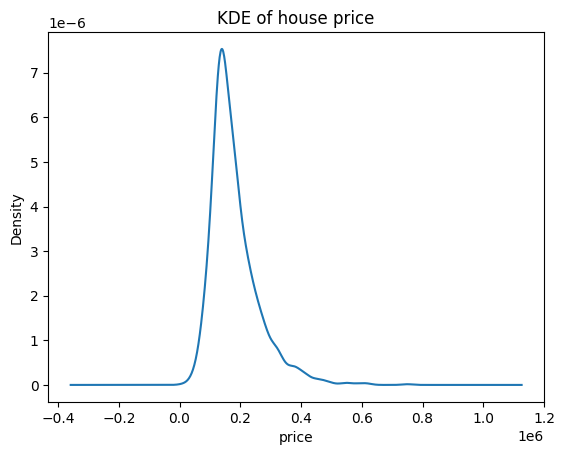

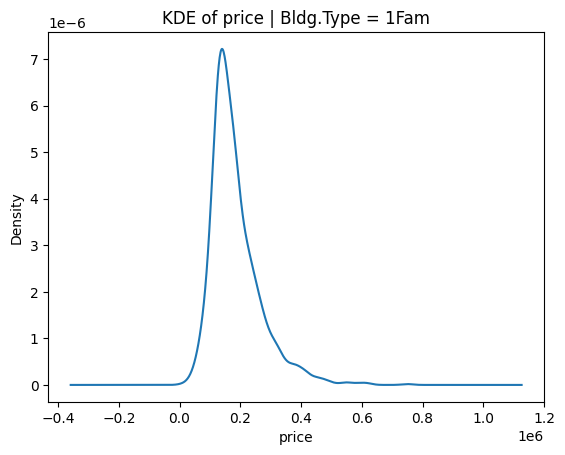

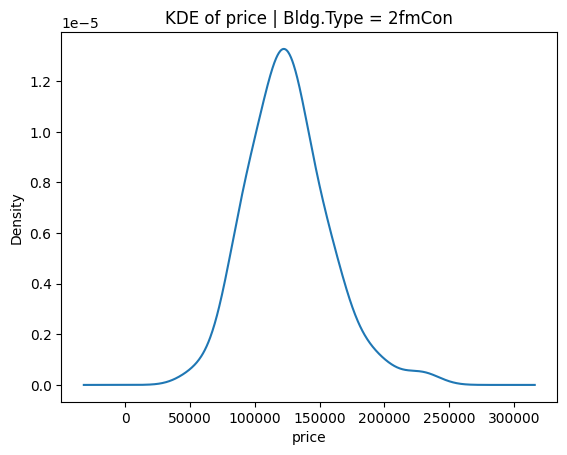

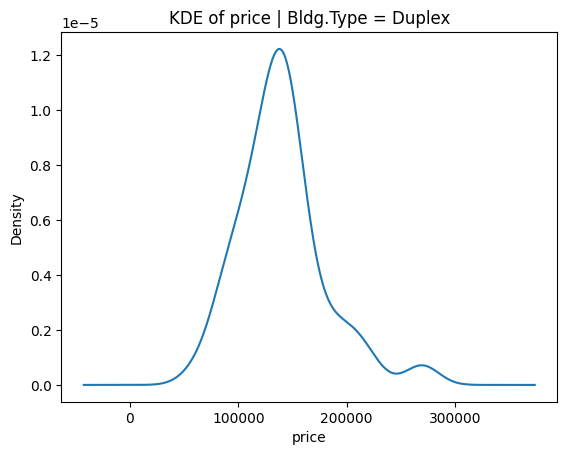

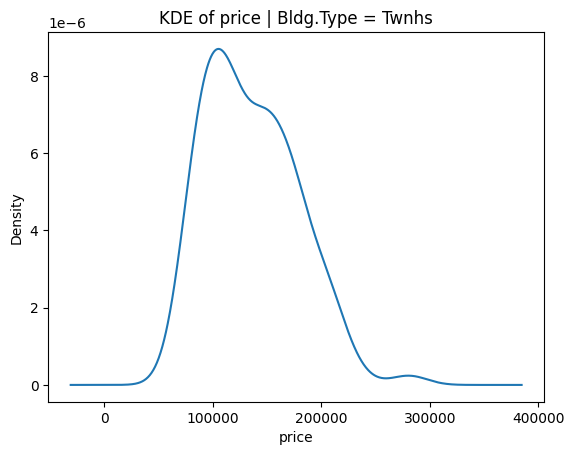

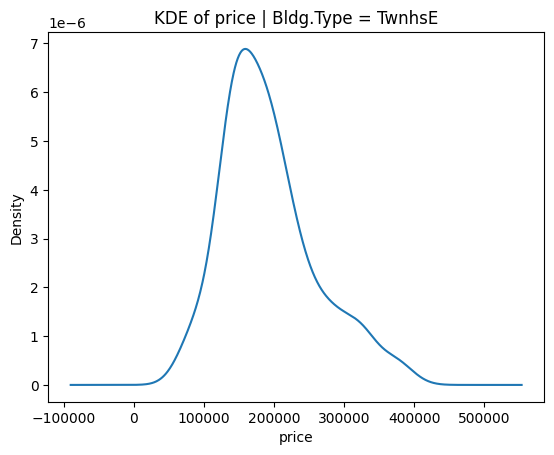

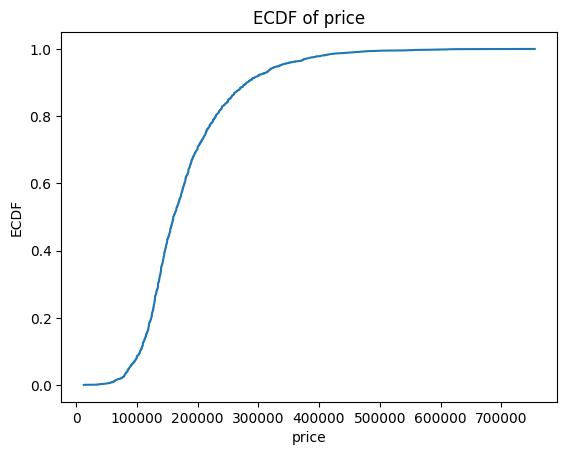

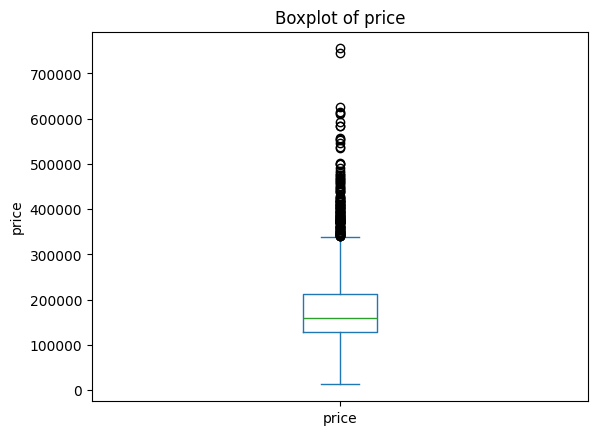

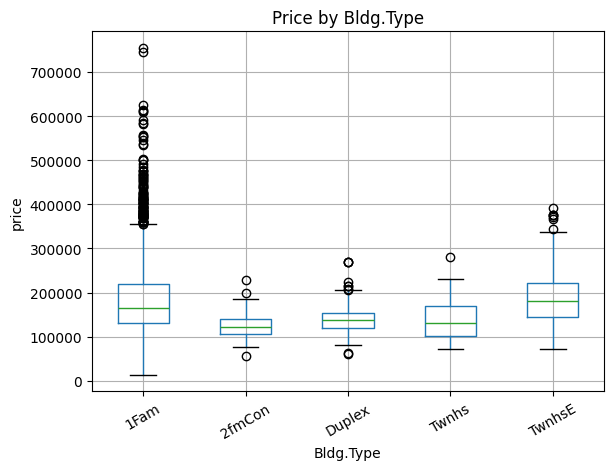

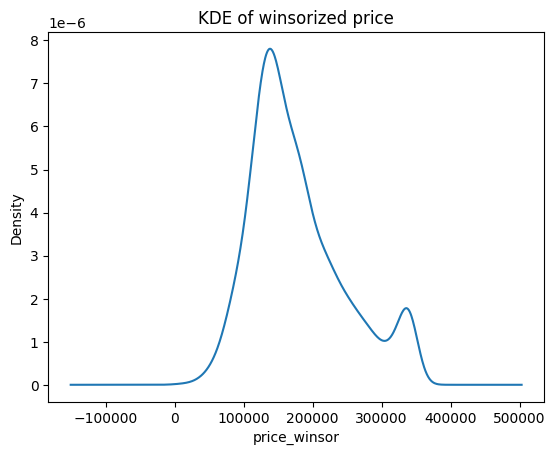

,price,price_winsor
count,2930.000000,2930.000000
mean,180796.060068,177082.283959
std,79886.692357,67906.837135
min,12789.000000,12789.000000
25%,129500.000000,129500.000000
50%,160000.000000,160000.000000
75%,213500.000000,213500.000000
max,755000.000000,339500.000000


In [ ]:
ames = pd.read_csv("./data/ames_prices.csv")
# ames.head()
# ames["price"].describe()
# QUESTION 2:
ames["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of house price")
plt.show()
ames["price"].describe()
ames.groupby("Bldg.Type")["price"].describe()
for btype, sub in ames.groupby("Bldg.Type"):
    sub["price"].dropna().plot(kind="kde")
    plt.xlabel("price")
    plt.title(f"KDE of price | Bldg.Type = {btype}")
    plt.show()

# QUESTION 3:
vals = ames["price"].dropna().sort_values().to_numpy()
n = len(vals)
plt.plot(vals, np.arange(1, n+1)/n) # Used ChatGPT 5.2
plt.xlabel("price")
plt.ylabel("ECDF")
plt.title("ECDF of price")
plt.show()
five_num = ames["price"].dropna().quantile([0, 0.25, 0.5, 0.75, 1])
five_num

# QUESTION 4:
ames["price"].plot(kind="box")
plt.ylabel("price")
plt.title("Boxplot of price")
plt.show()
ames.boxplot(column="price", by="Bldg.Type", rot=30)
plt.title("Price by Bldg.Type")
plt.suptitle("")
plt.ylabel("price")
plt.show()

# QUESTION 5:
q1 = ames["price"].quantile(0.25)
q3 = ames["price"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
higher = q3 + 1.5 * iqr
ames["is_outlier"] = ((ames["price"] < lower) | (ames["price"] > higher)).astype(int)
ames["is_outlier"].value_counts()

# QUESTION 6:
ames["price_winsor"] = ames["price"].clip(lower=lower, upper=higher)
ames["price_winsor"].dropna().plot(kind="kde")
plt.xlabel("price_winsor")
plt.title("KDE of winsorized price")
plt.show()
ames[["price", "price_winsor"]].describe()


